<h1>
    <b>
    Solve 2BV problem:
    </b>
    
</h1>

<!-- <font size="4"> -->
$$   
 \begin{equation}    
    p\frac{d^2y}{dx^2} = y - S\mbox{,}
 \end{equation}
$$  
where $p$ and $S$ are constants.
    
Boundary conditions:
    
 $$
 \text{at}\quad x = x_1: \quad \alpha \, y'(x) + \beta \, y(x) = \gamma \mbox{,} 
 $$
    
 $$
 \text{at}\quad x = x_N: \quad \alpha_1 \, y'(x) + \beta_1 \, y(x) = \gamma_1 \mbox{.} 
 $$

<!-- </font> -->


<h1>
    <b>
   Schwarzschild-Schuster 2BV problem:
    </b>
    
</h1>

<!-- <font size="4"> -->



$$   
 \begin{equation}    
    p\frac{d^2u}{dt^2} = u - S\mbox{,}
 \end{equation}
$$  
where $t=\tau$, $p=\mu^2 = const$, $S=const$
    
Boundary conditions:
    
 $$
 \text{at}\quad t = \tau_1\simeq 0: \quad \alpha \, u'(t) + \beta \, u(t) = \gamma \mbox{,} 
 $$
    
 $$
 \text{at}\quad t = \tau_N: \quad \alpha_1 \, u'(t) + \beta_1 \, u(t) = \gamma_1 \mbox{.} 
 $$
Source function in SS-approximation:
\begin{equation}
    S(t) = \frac{1}{2}\left( I^{+}(t) + I^{-}(t) \right)\equiv u(t)
\end{equation}


<!-- </font> -->


In [ ]:
function DensMatrixSolvAlongTheRay(xGrid, rayOne::LongRay1, sg::SGridPar, rad::RGridPar)
    
    
    Nn = rad.Nfreq; # ν - N bins 
    Nd = rayOne.numOfElm; # x - bins 
    Nmat = Nd*Nn
    
    Mat = zeros(Float32, Nmat, Nmat)
    Rhs = zeros(Float32, Nmat) #right side    
    
    alph = 1.
    bet = -1.
    gam = 0

    alph1 = 1.
    
    bet1 = 1.
    gam1 = 1.

    Sd = 2.
    Sbet =1.
    bm = 1.
    
    p=1.


    for i = 1:Nmat
        for i = 1:Nmat

            iSubMatRaw = div(i + Nn-1, Nn)         

            if iSubMatRaw == 1 
                Rhs[i] = -gam                   
            elseif iSubMatRaw == Nd 
                Rhs[i] = gam1
            else
                Rhs[i] = Sd+Sbet
            end


            for j = 1:Nmat


            jSubMatCol = div(j + Nn-1, Nn)

            iloc = i - Nn * (iSubMatRaw-1)        
            jloc = j - Nn * (jSubMatCol-1)

            if iSubMatRaw == 1 #left BC    


                dx_i = xGrid[2]-xGrid[1]
                dx_im05 = dx_i 
                dx_ip05 = dx_i        
                fPar = [dx_im05, dx_i, dx_ip05, 1]

                if jSubMatCol == 1
                    B1 = -bet + alph/dx_ip05

                    Mat[i,j] = iloc==jloc ? B1 : 0 #only diag    

                elseif jSubMatCol == 2

                    C1 = -alph/dx_ip05

                    Mat[i,j] = iloc==jloc ? C1 : 0

                end                        

            elseif iSubMatRaw > 1 && iSubMatRaw < Nd
    #           the main body of the matrix

                dx_i = xGrid[iSubMatRaw+1]-xGrid[iSubMatRaw]
                dx_im05 = dx_i 
                dx_ip05 = dx_i

                    if iSubMatRaw == jSubMatCol  && iloc==jloc
#                         B = 1 + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                        
                        B = 1 - bm + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                        
                        Mat[i,j] = B
                    elseif iSubMatRaw == jSubMatCol+1 && iloc==jloc                     
                        A =  -p /(dx_i*dx_im05)                     
                        Mat[i,j] = A                    
                    elseif iSubMatRaw == jSubMatCol-1                    
                        C=-(p/(dx_i*dx_ip05))                                        
                        Mat[i,j] = C
                    else                                        
                        Mat[i,j] = 0                                                        
                    end


            elseif iSubMatRaw == Nd #right BC                
                dx_i = xGrid[Nd]-xGrid[Nd-1]
                dx_im05 = dx_i 
                dx_ip05 = dx_i

                if jSubMatCol == Nd-1

                    AN = -(alph1/dx_im05)

                    Mat[i,j] = iloc==jloc ? AN : 0

                elseif jSubMatCol == Nd

                    BN = bet1 + alph1/dx_im05

                    Mat[i,j] = iloc==jloc ? BN : 0

                end

            end

            end


        end
    end

# end

    display(Mat)
    # display(Rhs)
    # @show Rhs
    Mat_inv = inv(Mat)
    # Mat_inv*Mat

    ytestNumeric1 = Mat_inv*Rhs

    
    
    end  #RTFotrieAlongTheRay

    
function SchwarzSchustRT()

        ray = arrOfLongRay[1, ijk_pos_s[IX], ijk_pos_s[IY], ijk_pos_s[IZ]]
    
        @show  ray.dir
                    
        tauGrid = range(0., 1; length = ray.numOfElm)    
        #typeof(tauGrid)
    
    
        DensMatrixSolvAlongTheRay(tauGrid, ray, sg, rad)
    

    
end



SchwarzSchustRT()


In [ ]:
function DensMatrixSolvAlongTheRay(xGrid, rayOne::LongRay1, sg::SGridPar, rad::RGridPar)
    
    
    Nn = rad.Nfreq; # ν - N bins 
    Nd = rayOne.numOfElm; # x - bins 
    Nmat = Nd*Nn
    
    Mat = zeros(Float32, Nmat, Nmat)
    Rhs = zeros(Float32, Nmat) #right side    
    
    alph = 1.
    bet = -1.
    gam = 0

    alph1 = 1.
    
    bet1 = 1.
    gam1 = 1.

    Sd = 2.
    Sbet =1.
    bm = 1.
    
    p=1.


    for i = 1:Nmat
        for i = 1:Nmat

            iSubMatRaw = div(i + Nn-1, Nn)         

            if iSubMatRaw == 1 
                Rhs[i] = -gam                   
            elseif iSubMatRaw == Nd 
                Rhs[i] = gam1
            else
                Rhs[i] = Sd+Sbet
            end


            for j = 1:Nmat


            jSubMatCol = div(j + Nn-1, Nn)

            iloc = i - Nn * (iSubMatRaw-1)        
            jloc = j - Nn * (jSubMatCol-1)

            if iSubMatRaw == 1 #left BC    


                dx_i = xGrid[2]-xGrid[1]
                dx_im05 = dx_i 
                dx_ip05 = dx_i        
                fPar = [dx_im05, dx_i, dx_ip05, 1]

                if jSubMatCol == 1
                    B1 = -bet + alph/dx_ip05

                    Mat[i,j] = iloc==jloc ? B1 : 0 #only diag    

                elseif jSubMatCol == 2

                    C1 = -alph/dx_ip05

                    Mat[i,j] = iloc==jloc ? C1 : 0

                end                        

            elseif iSubMatRaw > 1 && iSubMatRaw < Nd
    #           the main body of the matrix

                dx_i = xGrid[iSubMatRaw+1]-xGrid[iSubMatRaw]
                dx_im05 = dx_i 
                dx_ip05 = dx_i

                    if iSubMatRaw == jSubMatCol  && iloc==jloc
#                         B = 1 + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                        
                        B = 1 - bm + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                        
                        Mat[i,j] = B
                    elseif iSubMatRaw == jSubMatCol+1 && iloc==jloc                     
                        A =  -p /(dx_i*dx_im05)                     
                        Mat[i,j] = A                    
                    elseif iSubMatRaw == jSubMatCol-1                    
                        C=-(p/(dx_i*dx_ip05))                                        
                        Mat[i,j] = C
                    else                                        
                        Mat[i,j] = 0                                                        
                    end


            elseif iSubMatRaw == Nd #right BC                
                dx_i = xGrid[Nd]-xGrid[Nd-1]
                dx_im05 = dx_i 
                dx_ip05 = dx_i

                if jSubMatCol == Nd-1

                    AN = -(alph1/dx_im05)

                    Mat[i,j] = iloc==jloc ? AN : 0

                elseif jSubMatCol == Nd

                    BN = bet1 + alph1/dx_im05

                    Mat[i,j] = iloc==jloc ? BN : 0

                end

            end

            end


        end
    end

# end

    display(Mat)
    # display(Rhs)
    # @show Rhs
    Mat_inv = inv(Mat)
    # Mat_inv*Mat

    ytestNumeric1 = Mat_inv*Rhs

    
    
    end  #RTFotrieAlongTheRay

    
function SchwarzSchustRT()

        ray = arrOfLongRay[1, ijk_pos_s[IX], ijk_pos_s[IY], ijk_pos_s[IZ]]
    
        @show  ray.dir
                    
        tauGrid = range(0., 1; length = ray.numOfElm)    
        #typeof(tauGrid)
    
    
        DensMatrixSolvAlongTheRay(tauGrid, ray, sg, rad)
    

    
end



SchwarzSchustRT()


In [ ]:

# module RadTransfer
    

# ijk_pos = Array{Int64}(undef,3)
# ijk_max = [ sg.ie+1, sg.je+1, sg.ke+1 ] #max ijk index 
# ijk_min = [ sg.is, sg.js, sg.ks ] #min index

# distToNextCell = fill(BIGNUMBER,3) #used in FirstTimeTraceGridOverOneLongRay()


# norm[1, IX, :, :, :] .=  1
# norm[1, IY, :, :, :] .= -1
# norm[1, IZ, :, :, :] .= -1


# iOf_0 = argmin(abs.(x1)); jOf_0 = argmin(abs.(x2)); kOf_0 = argmin(abs.(x3))
# # ijk_pos .= [sg.is, sg.js, sg.ks]
# # ijk_pos .= [iOf_0, div(sg.je,2), div(sg.ke,2)]
# # ijk_pos .= [sg.ie, sg.je, sg.ke]

# ijk_pos .= [iOf_0,  jOf_0,  kOf_0]
# ijk_tmp = [0, 0, 0]



# rayOne.dir .= [norm[1, IX, 1, 1, 1], norm[1, IY, 1, 1, 1] , norm[1, IZ, 1, 1, 1]]


# rayOne.dir=LinearAlgebra.normalize(rayOne.dir)

# @show rayOne.dir
# @show ijk_pos

# xbi_zip = [x1b, x2b, x3b]



# x3c = [ x1[ijk_pos[IX]], x2[ijk_pos[IY]], x3[ijk_pos[IZ]] ]

# # @show x3c
# # @show x1
# # @show x1b

# # @show x2
# # @show x2b

# # @show x3
# # @show x3b

# # @show xbi_zip[2]


# FirstTimeTraceGridOverOneLongRay(rayOne, sg)







# end #module RadTransfer

In [ ]:
function FirstTimeTraceGridOverOneLongRay1(dir::Vector{Float64}, rayOne::LongRay1, sg::SGridPar)


#     @show dir
    
    dist = 0.0   
    distToNextCell .= BIGNUMBER

    xn .= x3c

    itermax = 2 * sg.Nx

    for iter in 1:itermax #max length, may be smaller than actual

    @show iter


        for (n_it, norm_i ) in enumerate(dir) #QUESTION: maybe iter over pre-calclulated 1/norms


          xc = x3c[n_it] 

             if iter > 1 

                itmp = ijk_tmp[n_it] = ijk_pos[n_it] + copysign(1, dir[n_it])

                @debug  " debug: (itmp, iter)= " , itmp, iter

                xn[n_it] = xbi_zip[n_it][itmp]                                            


             elseif iter==1 #first step from the middle of the cell

                if norm_i>0                
                   itmp = ijk_tmp[n_it] = ijk_pos[n_it] + copysign(1, dir[n_it])                     
                elseif norm_i <0               
                    itmp = ijk_tmp[n_it] = ijk_pos[n_it]  #belongs to the same index                                
                else                
                    itmp = ijk_pos[n_it]            
                end

                xn[n_it] = xbi_zip[n_it][itmp]

             end


             if norm_i != 0                      
                distToNextCell[n_it] = abs((xn[n_it] - xc)/dir[n_it])
             else
                distToNextCell[n_it]=BIGNUMBER
             end


        #println("iter= ",iter," xn=", xn, " ===> ", "distToNextCell[",n_it,"]=",distToNextCell[n_it])



        end #for loop over norm_i     

            posIndxToUpdate = argmin(distToNextCell)
            dist = distToNextCell[posIndxToUpdate]


        ijk_pos[posIndxToUpdate] = ijk_tmp[posIndxToUpdate] #update only relevant one
    

        #println("ijk_pos[posIndxToUpdate = ", posIndxToUpdate, "]",  "  =  ",   ijk_pos  )


        xn .= x3c + dir*dist
        x3c .= xn

        #update rayOne
        rayOne.numOfElm = iter
        rayOne.ijkOfCellCrossed[:,iter] .= ijk_pos
        rayOne.xyzPos[:,iter] .= xn

#         println("iter=", iter,"  ", "xn= ", xn)

        if ijk_pos[posIndxToUpdate] == ijk_max[posIndxToUpdate] || ijk_pos[posIndxToUpdate] == ijk_min[posIndxToUpdate] || ijk_pos[posIndxToUpdate] == 1 || iter > 100 
            break; 
        end      

    end #over ray

end # FirstTimeTraceGridCalcOneLongRay

function TraceGridBothWaysAllocateArrPair(rad::RGridPar, sg::SGridPar)
    
    dirOld =Array{Float64}(undef,3)
    dirf =Array{Float64}(undef,3)
    dirb =Array{Float64}(undef,3)
    
    testRay_f = LongRay1(NumElemInRayMax, Array{Int32}(undef,3,NumElemInRayMax),  Array{Float64}(undef,3,NumElemInRayMax) )       
    testRay_b = LongRay1(NumElemInRayMax, Array{Int32}(undef,3,NumElemInRayMax),  Array{Float64}(undef,3,NumElemInRayMax) )       
#     @show ijk_pos_s            

    for m=1:rad.N_fre_ang #, ipos=1:sg.Nxtot, jpos=1:sg.Nytot, kpos=1:sg.Nztot

        
        dirf .= norm[m,:]
        dirb .= -norm[m,:]
                        
        ip=ijk_pos_s[IX]; jp=ijk_pos_s[IY]; kp=ijk_pos_s[IZ]
        ijk_pos .= ijk_pos_s        
        
        x3c .= [ x1[ip], x2[jp], x3[kp] ]
        FirstTimeTraceGridOverOneLongRay(dirf, testRay_f, sg)         
        
        ijk_pos .= ijk_pos_s
        x3c .= [ x1[ip], x2[jp], x3[kp] ]
        FirstTimeTraceGridOverOneLongRay(dirb, testRay_b, sg)                                            
        
        # now, when the length of the ray is known, allocate arrOfLongRay[m,i,j,k]
        
        rayPairArr[m,ip,jp,kp] = RayPair(
            Array{Int32,1}(undef,3), 
            Array{Float64,1}(undef,3),

            LongRay1(testRay_f.numOfElm, Array{Int32}(undef,3,testRay_f.numOfElm), 
            Array{Float64}(undef,3,testRay_f.numOfElm)),
            
            LongRay1(testRay_b.numOfElm, Array{Int32}(undef,3,testRay_b.numOfElm), 
            Array{Float64}(undef,3,testRay_b.numOfElm))            
            )
                        
        rayPairArr[m,ip,jp,kp].ray_b.numOfElm = testRay_b.numOfElm  
        rayPairArr[m,ip,jp,kp].ray_f.numOfElm = testRay_f.numOfElm                      
        
        rayPairArr[m,ip,jp,kp].hed .= ijk_pos_s
        
        rayPairArr[m,ip,jp,kp].dir .= dirf

        for iter = 1:testRay_f.numOfElm       
            rayPairArr[m,ip,jp,kp].ray_f.ijkOfCellCrossed[:,iter] .= testRay_f.ijkOfCellCrossed[:,iter]
            rayPairArr[m,ip,jp,kp].ray_f.xyzPos[:,iter] .= testRay_f.xyzPos[:,iter]
        end
# @show testRay_b.numOfElm
        
        for iter = 1:testRay_b.numOfElm       
            rayPairArr[m,ip,jp,kp].ray_b.ijkOfCellCrossed[:,iter] .= testRay_b.ijkOfCellCrossed[:,iter]
            rayPairArr[m,ip,jp,kp].ray_b.xyzPos[:,iter] .= testRay_b.xyzPos[:,iter]
        end
        
        
    end
    
end


function TestRybHumAlongTheRay(rad)
    # pick a ray
    
    TraceGridAllocRayArr(rad, sg)
    
    ray =  rayPairArr[rand(1:rad.N_fre_ang), 
        ijk_pos_s[IX], ijk_pos_s[IY], ijk_pos_s[IZ]].ray_f
    
    den .= 2*10^3.
    opa .= 1.
    
    u1 = ProgonRybHumAlongTheRay(ray, sg, rad)
    u = ProgonRybHumAlongTheRayAppndxA(ray, sg, rad);    
#     @show u1 u
    Δ=LinearAlgebra.norm((u-u1)./u1)
    println( "relative difference between ProgonRybHumAlongTheRayAppndxA 
        and ProgonRybHumAlongTheRay:\n Δu/u=", Δ )    

    if Δ <= 1e-2
        println(" Test Passed ! ")    
    else
        error( " Test Failed !")
    end

    den.=opa.=0.;

end


In [ ]:
 ************************** ************************** **************************

 ************************** ************************** **************************

In [1]:
# import Pkg;
# Pkg.add("Plots");




xGrid = range(0.0, 1; length = Nd) = 0.0:0.02040816326530612:1.0


0.0:0.02040816326530612:1.0

50×50 Array{Float32,2}:
    48.0    -49.0      0.0      0.0  …      0.0      0.0      0.0      0.0
 -2401.0   4803.0  -2401.0      0.0         0.0      0.0      0.0      0.0
     0.0  -2401.0   4803.0  -2401.0         0.0      0.0      0.0      0.0
     0.0      0.0  -2401.0   4803.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0  -2401.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 

50-element Array{Float32,1}:
 -0.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  ⋮
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  0.0

xGrid = range(0.0, 1; length = Nd) = 0.0:0.02040816326530612:1.0


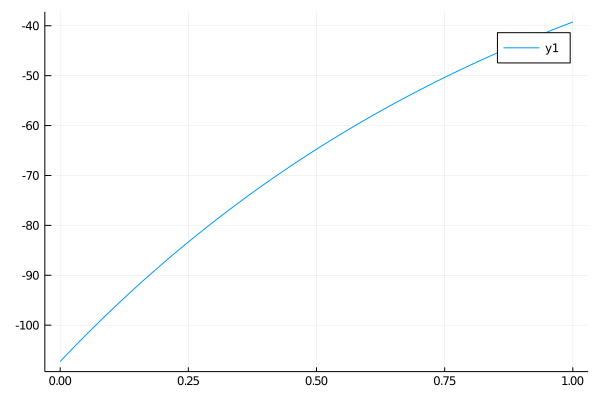

In [11]:

using Plots

Nn = 1; # ν - N bins 
Nd = 50; # x - bins 

@show xGrid = range(0., 1; length = Nd)



# xr = circshift(xGrid, -1)
# xr[end] = 2xr[end-1]-xr[end-2]
# @show xr
# @show xGridOneHalf = 0.5(xGrid + xr)
# @show dxGrid = xr - xGrid
# xsh = circshift(xGrid, 1)
# xsh[1] = 2xsh[2]-xsh[3]
# @show xsh

Nmat = Nd*Nn
Mat = zeros(Float32, Nmat, Nmat)

Rhs = zeros(Float32, Nmat) #right side

let

alph = 1.
bet = 1.
gam = 0.

alph1 = 1.
bet1 = 1.
gam1 = 0.

Sd = 2.

p=1.


for i = 1:Nmat
    for i = 1:Nmat

        iSubMatRaw = div(i + Nn-1, Nn)         

        if iSubMatRaw == 1 
            Rhs[i] = -gam                   
        elseif iSubMatRaw == Nd 
            Rhs[i] = gam1
        else
            Rhs[i] = Sd
        end
                
        
        for j = 1:Nmat
                               
       
        jSubMatCol = div(j + Nn-1, Nn)
        
        iloc = i - Nn * (iSubMatRaw-1)        
        jloc = j - Nn * (jSubMatCol-1)
        
        if iSubMatRaw == 1 #left BC    

            
            dx_i = xGrid[2]-xGrid[1]
            dx_im05 = dx_i 
            dx_ip05 = dx_i        
            fPar = [dx_im05, dx_i, dx_ip05, 1]
                       
            if jSubMatCol == 1
                B1 = -bet + alph/dx_ip05
                
                Mat[i,j] = iloc==jloc ? B1 : 0 #only diag    
                
            elseif jSubMatCol == 2
                
                C1 = -alph/dx_ip05
                
                Mat[i,j] = iloc==jloc ? C1 : 0
                                
            end                        
            
        elseif iSubMatRaw > 1 && iSubMatRaw < Nd
#           the main body of the matrix
                
            dx_i = xGrid[iSubMatRaw+1]-xGrid[iSubMatRaw]
            dx_im05 = dx_i 
            dx_ip05 = dx_i
                
                if iSubMatRaw == jSubMatCol  && iloc==jloc
                    B = 1 + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                    Mat[i,j] = B
                elseif iSubMatRaw == jSubMatCol+1 && iloc==jloc                     
                    A =  -p /(dx_i*dx_im05)                     
                    Mat[i,j] = A                    
                elseif iSubMatRaw == jSubMatCol-1                    
                    C=-(p/(dx_i*dx_ip05))                                        
                    Mat[i,j] = C
                else                                        
                    Mat[i,j] = 0                                                        
                end
                        

        elseif iSubMatRaw == Nd #right BC                
            dx_i = xGrid[Nd]-xGrid[Nd-1]
            dx_im05 = dx_i 
            dx_ip05 = dx_i
            
            if jSubMatCol == Nd-1
                
                AN = -(alph1/dx_im05)
                
                Mat[i,j] = iloc==jloc ? AN : 0

            elseif jSubMatCol == Nd
                
                BN = bet1 + alph1/dx_im05
                
                Mat[i,j] = iloc==jloc ? BN : 0
                
            end
                                                        
        end
        
        end
        
        
    end
end

end

display(Mat)
display(Rhs)
# @show Rhs
Mat_inv = inv(Mat)
# Mat_inv*Mat

ytestNumeric1 = Mat_inv*Rhs


plot(xGrid, ytestNumeric1)

<h1>
Analytical solution:
</h1>


\begin{equation}
 p \,y''(x) = y(x) - S
\end{equation}

\begin{eqnarray}
a_0 y'(x_0) + b_0 y(x_0)&=&  g_0,\\
a_1 y'(x_1) + b_1 y(x_1)&=&  g_1,
\end{eqnarray}




The solution on the interval: $[ x_0, x_1 ]$:

$$
y(x)=
\frac{2 e^{\frac{\text{x0}+\text{x1}}{\sqrt{p}}} \left(\sqrt{p} \left(S
   (\text{a0} \text{b1}-\text{a1} \text{b0}) \cosh
   \left(\frac{\text{x0}-\text{x1}}{\sqrt{p}}\right)+\text{a0}
   (\text{g1}-\text{b1} S) \cosh
   \left(\frac{x-\text{x0}}{\sqrt{p}}\right)+\text{a1} (\text{b0}
   S-\text{g0}) \cosh \left(\frac{x-\text{x1}}{\sqrt{p}}\right)\right)+S
   \sinh \left(\frac{\text{x0}-\text{x1}}{\sqrt{p}}\right) (\text{b0}
   \text{b1} p-\text{a0} \text{a1})+\text{b1} p (\text{g0}-\text{b0} S)
   \sinh \left(\frac{x-\text{x1}}{\sqrt{p}}\right)+\text{b0} p (\text{b1}
   S-\text{g1}) \sinh
   \left(\frac{x-\text{x0}}{\sqrt{p}}\right)\right)}{e^{\frac{2
   \text{x0}}{\sqrt{p}}} \left(\text{a0}+\text{b0} \sqrt{p}\right)
   \left(\text{b1} \sqrt{p}-\text{a1}\right)+e^{\frac{2
   \text{x1}}{\sqrt{p}}} \left(\text{a0}-\text{b0} \sqrt{p}\right)
   \left(\text{a1}+\text{b1} \sqrt{p}\right)}
$$

xGrid = range(0.0, 1; length = Nd) = 0.0:0.05263157894736842:1.0
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf
y = Inf


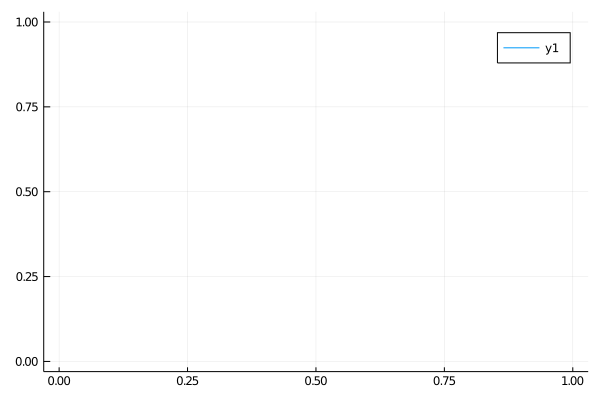

In [9]:

using Plots

Nd = 20; # x - bins 

@show xGrid = range(0., 1; length = Nd)

function test_sol2bvp1(x::Float64; S::Float64,x0::Float64,x1::Float64,p::Float64,
        a0::Float64,b0::Float64,g0::Float64,a1::Float64,b1::Float64,g1::Float64)
    
     sol::Float64 = (2*exp((x0 + x1)/sqrt(p))*
      (sqrt(p)*(a0*(g1 - b1*S)*cosh((x - x0)/sqrt(p)) + 
     a1*(-g0 + b0*S)*cosh((x - x1)/sqrt(p)) + 
     (-(a1*b0) + a0*b1)*S*cosh((x0 - x1)/sqrt(p))) + 
     b0*p*(-g1 + b1*S)*sinh((x - x0)/sqrt(p)) + 
     b1*p*(g0 - b0*S)*sinh((x - x1)/sqrt(p)) + 
     (-(a0*a1) + b0*b1*p)*S*sinh((x0 - x1)/sqrt(p))))/
     (exp((2*x0)/sqrt(p))*(a0 + b0*sqrt(p))*(-a1 + b1*sqrt(p)) + 
     exp((2*x1)/sqrt(p))*(a0 - b0*sqrt(p))*(a1 + b1*sqrt(p)))
    
    return(sol)
   
end

function test_sol2bvp2(x; S, x0 ,x1 ,p ,
        a0, b0,g0 ,a1 ,b1 ,g1 )
    
     sol= (2*exp((x0 + x1)/sqrt(p))*
      (sqrt(p)*(a0*(g1 - b1*S)*cosh((x - x0)/sqrt(p)) + 
     a1*(-g0 + b0*S)*cosh((x - x1)/sqrt(p)) + 
     (-(a1*b0) + a0*b1)*S*cosh((x0 - x1)/sqrt(p))) + 
     b0*p*(-g1 + b1*S)*sinh((x - x0)/sqrt(p)) + 
     b1*p*(g0 - b0*S)*sinh((x - x1)/sqrt(p)) + 
     (-(a0*a1) + b0*b1*p)*S*sinh((x0 - x1)/sqrt(p))))/
     (exp((2*x0)/sqrt(p))*(a0 + b0*sqrt(p))*(-a1 + b1*sqrt(p)) + 
     exp((2*x1)/sqrt(p))*(a0 - b0*sqrt(p))*(a1 + b1*sqrt(p)))
    
    return(sol)
   
end



# @time ytest=[test_sol2bvp1(xGrid[i]; S=2., x0=0., x1=1., p=1.,
#               a0=0.,b0=1.,g0=4.,
#               a1=0.,b1=1.,g1=10.) for i in 1:xGrid.len]              

# @time ytest=[test_sol2bvp2(xGrid[i]; S=2., x0=0., x1=1., p=1.,
#               a0=1.,b0=1.,g0=0.,
#               a1=1.,b1=1.,g1=0.) for i in 1:xGrid.len]              

for i in 1:xGrid.len

    y = test_sol2bvp2(xGrid[i]; S=2., x0=0., x1=1., p=1.,
              a0=1.,b0=1.,g0=0.,
              a1=1.,b1=1.,g1=0.) 

    @show y
    
end
    
plot(xGrid, ytest)

# plt = plot(layout = (1, 2))
# plot!(plt[1],xGrid, ytest, linecolor=:red)

# plot!(plt[2],xGrid, ytestNumeric1)


In [24]:
function AMatCoef_im1(i,j,pars)
    
    dtim05,dti,dtip05,mu = pars
    k1=mu
    
    k = 1;  # BC related
    
    if i == Nd
        A = k/dtim05
    else
        A = k1^2/(dti*dtim05)
    end
    
    A = i==j ? A : 0
    
    return(A)
end

function BMatCoef_i(i,j,pars)
            
    C= dtim05,dti,dtip05,mu = pars

    k1 = 1. #BC related param
    
    if i == 1
        
        B = 1 + k1/dtip05
            
        
    else
    
        
        B = 1 + ((1/dtim05 + 1/dtip05)*k1^2)/dti
    end
    
    B = i==j ? B : 0    
    
#     println(B," ",i, "  ",j)
    
    return(B)
end

function CMatCoef_ip1(i,j,pars)
    
    dtim05,dti,dtip05,mu = pars
    k1=mu

    if i == 1
        C = k1/dtip05
        
#         C = 2 + dtip05^2/(2.*k1)
        
    else
        C = k1^2/(dti*dtip05)
    end
    
    C = i==j ? C : 0
    
    return(C)
end    

function RhsVector(i,pars)
    dtim05,dti,dtip05,mu = pars
    k=mu
    
    S = 1
    return(S)
end


RhsVector (generic function with 1 method)

In [2]:
module test

mutable struct Foo
      
    num_el::Int32
    
#     ijkOfCellCrossed:: Matrix{Int32}
#     dl :: Vector{Float64}
#     pos::Matrix{Float64}

end

# mutable struct Bar    
    
# end

bar = Array{Foo,1}(undef,10)

# size(bar)


Ntot=10
end

Main.test

<h2>
Carlson angular discretization
</h2>

In [ ]:
# bar = Array{Float64}(undef,3,Ntot)
# @show size(bar)

# foo = Foo(Ntot, zeros(Int32,3,Ntot), zeros(Float64,Ntot), Array{Float64}(undef,3,Ntot) )


# @show size(foo.pos)


# function testperf()

#     @time  for i = 1:3
#         for j = 1:Ntot 
#         foo.pos[i,j] += 1 
#         end
#         end

# @time for j = 1:Ntot
#             foo.pos[:,j] .= 1:3
#         end #best?

# @time  for j = 1:Ntot
#        for i = 1:3 
#             foo.pos[i,j] += 1 
#         end
#         end

# @time for j = 1:Ntot, i = 1:3 
#     bar[i,j] += 1 
# end

# @time for i = 1:3, j = 1:Ntot 
#     bar[i,j] += 1 
# end

# end


#  testperf()

# @show foo.ijkOfCellCrossed


